In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib

In [2]:
data = pd.read_excel('/content/Health Care dataset.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
df = data.copy()

In [4]:
df.head()

,Timestamp,Name,Age,Gender,Location,\nState,Body weight in Kg,BMI,Height in centimeters:,Work Type,...,Stress levels grede,Medical History (any illness or conditions happened),"If Yes, mention it below",Currently taking any Medicine,Were you infected by COVID-19,"If yes, days of admission in hospital",How many days you eat outside food in a week?,How many times you eat junk food in a week?,How often you do physical activity in a week?,"If yes, name of the medicine"
0,2023-12-31 20:26:30.000,Chezhian,22,Male,Chennai,Tamil Nadu,95,28.680111,182,Desk Job,...,4,Yes,Blood pressure,No,Yes,5.0,3,2,4,NaN
1,2024-01-01 20:26:29.995,Akash,22,Male,Puducherry,Tamil Nadu,90,32.270788,167,Desk Job,...,1,No,Nil,No,No,0.0,3,2,4,NaN
2,2024-01-02 20:26:29.995,Jack,23,Male,Coimbatore,Tamil Nadu,65,23.030045,168,Desk Job,...,4,No,NaN,Yes,No,NaN,2,1,4,Aspirin
3,2024-01-03 20:26:30.000,Vijaya Shalini S,22,Female,Salem,Tamil Nadu,63,23.140496,165,Desk Job,...,3,No,NaN,No,No,NaN,3,2,0,NaN
4,2024-01-04 20:26:29.995,Raji,21,Female,Chennai,Tamil Nadu,41,18.222222,150,Desk Job,...,1,No,NaN,No,Yes,0.0,1,0,7,NaN


In [5]:
df.describe()

,Age,Body weight in Kg,BMI,Height in centimeters:,Stress levels grede,"If yes, days of admission in hospital",How many days you eat outside food in a week?,How many times you eat junk food in a week?,How often you do physical activity in a week?
count,100.000000,100.000000,100.000000,100.000000,100.000000,13.000000,100.000000,100.00000,100.000000
mean,39.630000,71.780000,25.969742,167.600000,2.510000,2.461538,2.240000,1.41000,3.950000
std,20.816978,18.358154,7.732025,13.278676,1.226764,3.799460,2.146738,1.57053,2.367179
min,19.000000,37.000000,13.149244,122.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,23.000000,58.000000,20.152355,158.000000,1.000000,0.000000,1.000000,0.00000,2.000000
50%,26.500000,68.500000,24.988639,167.000000,3.000000,0.000000,2.000000,1.00000,4.000000
75%,59.250000,87.250000,29.983236,178.000000,3.000000,5.000000,3.000000,2.00000,6.000000
max,85.000000,120.000000,47.086801,198.000000,5.000000,10.000000,7.000000,7.00000,7.000000


In [6]:
df.isnull().sum()

Timestamp                                                0
Name                                                     0
Age                                                      0
Gender                                                   0
Location                                                 0
\nState                                                  0
Body weight in Kg                                        0
BMI                                                      0
Height in centimeters:                                   0
Work Type                                                0
Work Shift                                               0
Duration of Sleep                                        0
Mode of Travel                                           0
Physical Activity                                        0
Food                                                     0
Stress Level                                             0
Stress levels grede                                     

In [7]:
df = df.dropna(axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Timestamp                                             100 non-null    datetime64[ns]
 1   Name                                                  100 non-null    object        
 2   Age                                                   100 non-null    int64         
 3   Gender                                                100 non-null    object        
 4   Location                                              100 non-null    object        
 5   
State                                                100 non-null    object        
 6   Body weight in Kg                                     100 non-null    int64         
 7   BMI                                                   100 non-null    float64    

In [9]:
df.columns

Index(['Timestamp', 'Name', 'Age', 'Gender', 'Location', '\nState ',
       'Body weight in Kg', 'BMI', 'Height in centimeters:', 'Work Type',
       'Work Shift', 'Duration of Sleep', 'Mode of Travel',
       'Physical Activity', 'Food', 'Stress Level', 'Stress levels grede',
       'Medical History (any illness or conditions happened)',
       'Currently taking any Medicine', 'Were you infected by COVID-19',
       'How many days you eat outside food in a week? ',
       'How many times you eat junk food in a week?',
       'How often you do physical activity in a week?'],
      dtype='object')

In [10]:
# We will create a binary target based on BMI: 'Healthy' if BMI is in the range 18.5 to 24.9, otherwise 'Not Healthy'
df['Health_Status'] = ['Healthy' if 18.5 <= x <= 24.9 else 'Not Healthy' for x in df['BMI']]

In [11]:
columns_to_drop = ['Timestamp', 'Name', 'Location', '\nState ']
df = df.drop(columns=columns_to_drop)

In [12]:
df['Duration of Sleep'] = df['Duration of Sleep'].str.extract('(\d+)').astype(float)

In [13]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Gender', 'Work Type', 'Work Shift', 'Mode of Travel',
       'Physical Activity', 'Food', 'Stress Level',
       'Medical History (any illness or conditions happened)',
       'Currently taking any Medicine', 'Were you infected by COVID-19',
       'Health_Status'],
      dtype='object')

In [14]:
categorical_columns = ['Gender', 'Work Type', 'Work Shift', 'Mode of Travel', 'Physical Activity', 'Food',
                        'Stress Level', 'Medical History (any illness or conditions happened)',
                        'Currently taking any Medicine', 'Were you infected by COVID-19']

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Accuracy on the test set: 1.0


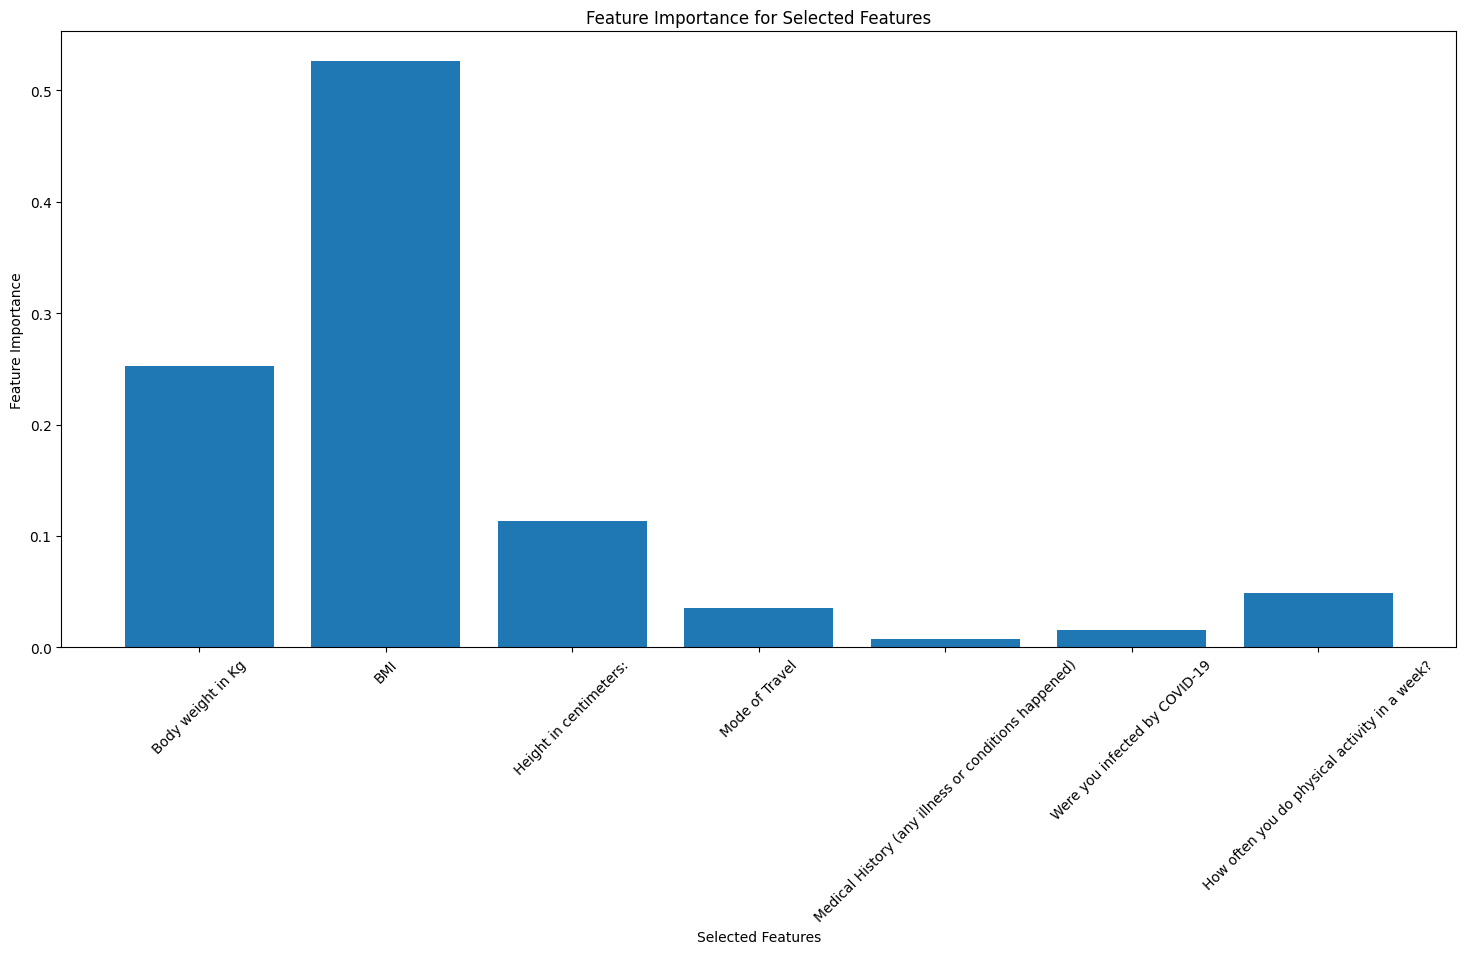

In [15]:
X = df.drop('Health_Status', axis=1)
y = df['Health_Status']

# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Select only the top 5 features based on ANOVA F-statistic
selector = SelectKBest(f_classif, k=7)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Train a model using only the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Create a bar chart to visualize feature importance
feature_importance = clf.feature_importances_
plt.figure(figsize=(18, 8))
plt.bar(range(len(selected_feature_names)), feature_importance , width= 0.8)
plt.xticks(range(len(selected_feature_names)), selected_feature_names, rotation=45)
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Selected Features')
plt.show()


In [16]:
sf = df[['Body weight in Kg','BMI','Height in centimeters:','Mode of Travel','Medical History (any illness or conditions happened)',
         'Were you infected by COVID-19','How often you do physical activity in a week?','Health_Status']]
sf.head()

,Body weight in Kg,BMI,Height in centimeters:,Mode of Travel,Medical History (any illness or conditions happened),Were you infected by COVID-19,How often you do physical activity in a week?,Health_Status
0,95,28.680111,182,1,1,1,4,Not Healthy
1,90,32.270788,167,0,0,0,4,Not Healthy
2,65,23.030045,168,1,0,0,4,Healthy
3,63,23.140496,165,1,0,0,0,Healthy
4,41,18.222222,150,1,0,1,7,Not Healthy


In [17]:
sf.columns

Index(['Body weight in Kg', 'BMI', 'Height in centimeters:', 'Mode of Travel',
       'Medical History (any illness or conditions happened)',
       'Were you infected by COVID-19',
       'How often you do physical activity in a week?', 'Health_Status'],
      dtype='object')

In [18]:
x = sf.drop(columns='Health_Status',axis=1)
y = sf['Health_Status']

In [19]:
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
prd = lr.predict(x_test)
acc = round(accuracy_score(prd,y_test)*100)
print('Logistic Regression accuracy :',acc,'%')

Logistic Regression accuracy : 80 %


In [22]:
svcl = SVC()
svcl.fit(x_train,y_train)
sprd = svcl.predict(x_test)
sacc = round(accuracy_score(sprd,y_test)*100)
print('Support Vector Classifier accuracy :',sacc,'%')

Support Vector Classifier accuracy : 85 %


In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dprd = dtc.predict(x_test)
dacc = round(accuracy_score(dprd,y_test)*100)
print('DecisionTree Classifier accuracy :',dacc,'%')

DecisionTree Classifier accuracy : 100 %


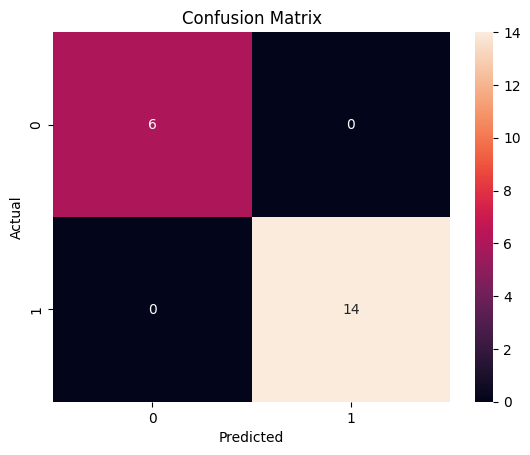

In [24]:
cf_matrix = confusion_matrix(y_test,dprd)
sns.heatmap(cf_matrix,annot=True,fmt='d')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [25]:
print(classification_report(y_test,dprd))

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00         6
 Not Healthy       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [26]:
input_data = (95,28.680111,182,'Own Vehicle','Yes','No',4)

mapping = {'Yes': 1, 'No': 0 , 'Public Transport' : 1 ,'Own Vehicle' : 0 , 'Walk' :2}

encoded_data = (
    input_data[0],
    input_data[1],
    input_data[2],
    mapping[input_data[3]],
    mapping[input_data[4]],
    mapping[input_data[5]],
    input_data[6]
)

input_data_as_numpy_array = np.asarray(encoded_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = sc.transform(input_data_reshaped)

prediction = dtc.predict(std_data)
print(prediction[0])

Not Healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
joblib.dump(sc,'std.joblib')
joblib.dump(dtc,'dtc.joblib')

['dtc.joblib']

In [28]:
from sklearn import __version__ as sklearn_version
print(f"Scikit-learn version: {sklearn_version}")

Scikit-learn version: 1.3.2
